## Plot narwhal and beluga detections with sea ice concentration

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

Closest grid cell to mooring location

### Load Data

In [2]:
## load sea ice data
seaice_1d_ds = xr.open_dataset('data/seaice_2018to2020_1d.nc')

In [3]:
ice_fish_ds = seaice_1d_ds.sel(latitude=76.1038, longitude=-61.7270, method='nearest').siconc # gives us grid cell at 76, -61.75
ice_kong_ds = seaice_1d_ds.sel(latitude=75.8418, longitude=-59.8431, method='nearest').siconc # gives us grid cell at 75.75, -59.75

### 6-hour resolution

In [ ]:
# import 6 hour narwhal acoustic detection data
# Kong Oscar 2019 ST data
kong_ST_det = pd.read_csv('data/KongOscar_ST_6hr_UTC.csv')

# Fisher Islands ST data
fish_ST_det = pd.read_csv('data/Fisher_ST_6hr_UTC.csv')

In [ ]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['Time_UTC'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%Y/%b/%d %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

In [ ]:
kong_ST_det_dates_array = csv_to_datetime(kong_ST_det)
fish_ST_det_dates_array = csv_to_datetime(fish_ST_det)

In [ ]:
## narwhal detections
fish_narwhal_dets = fish_ST_det_dates_array[np.where(np.array(fish_ST_det.narwhal)==1)]
kong_narwhal_dets = kong_ST_det_dates_array[np.where(np.array(kong_ST_det.narwhal)==1)]

## beluga detections
fish_beluga_dets = fish_ST_det_dates_array[np.where(np.array(fish_ST_det.beluga)==1)]
kong_beluga_dets = kong_ST_det_dates_array[np.where(np.array(kong_ST_det.beluga)==1)]

In [ ]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.5)
ax1.set_xlim(np.datetime64('2019-05-01'), np.datetime64('2020-03-01'))

## FISHER ====
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax1)
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax2)

# add detections ----
for xcoord in fish_narwhal_dets:
    ax1.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fish_beluga_dets:
    ax2.axvline(x=xcoord, color='k', linewidth=1)

## KONG OSCAR ====
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax3)
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax4)

# add detections ----
for xcoord in kong_narwhal_dets:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in kong_beluga_dets:
    ax4.axvline(x=xcoord, color='k', linewidth=1)

ax4.set_xlabel("Month",labelpad=20)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.margins(x=0,y=0)
    ax.set_ylim(0,100)
    ax.tick_params(axis='y', colors='tab:blue')

ax1.set_title("Fisher")
ax1.set_title("(a)", loc='left')
ax2.set_title("(b)", loc='left')
ax3.set_title("Kong Oscar")
ax3.set_title("(c)", loc='left')
ax4.set_title("(d)", loc='left')

# shade regions when ST was not recording
# Fisher
for ax in (ax1,ax2):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2019-12-20'), np.datetime64('2020-04-01'), color='black', alpha=0.15)
# Kong Oscar
for ax in (ax3,ax4):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2020-01-16'), np.datetime64('2020-04-01'), color='black', alpha=0.15);
    
months   = pd.period_range(np.datetime64('2019-05'), freq='M', periods=11).strftime('%Y-%m').tolist()
abbrev = ["May\n\n2019",'Jun','Jul','Aug',"Sep","Oct",'Nov','Dec',"Jan\n\n2020",'Feb','Mar']
ax4.set_xticks(months, [])
ax4.set_xticks(months, abbrev, rotation=0, horizontalalignment = 'center');

## add icons for beluga and narwhal
beluga  = plt.imread('beluga_icon.png') # insert local path of the image
narwhal = plt.imread('narwhal_icon.png')
## plot icons
ax1_insert = fig.add_axes([0.79,0.7,0.11,0.11], anchor='NE', zorder=1)
ax1_insert.imshow(narwhal)
ax2_insert = fig.add_axes([0.79,0.495,0.09,0.09], anchor='NE', zorder=1)
ax2_insert.imshow(beluga)
ax3_insert = fig.add_axes([0.79,0.28,0.11,0.11], anchor='NE', zorder=1)
ax3_insert.imshow(narwhal)
ax4_insert = fig.add_axes([0.79,0.075,0.09,0.09], anchor='NE', zorder=1)
ax4_insert.imshow(beluga)

fig.text(0.05,0.5,"Sea ice cover (%)",verticalalignment='center',color='tab:blue',rotation=90)

for ax in (ax1_insert,ax2_insert,ax3_insert,ax4_insert):
    ax.axis('off')
    
## add legend
legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),
                   Line2D([], [], marker='|', linestyle='None',color='k', lw=1,markersize=20, label='Whale detection'),
                   Line2D([], [], marker='|', linestyle='None',color='r', lw=1,markersize=20, label='Missed detection')]
ax4.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.8),frameon=False);

plt.savefig('figures/detections_seaice_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

### 1-hour resolution

In [4]:
# import 1 hour narwhal acoustic detection data
# Kong Oscar 2019 ST data
kong_ST_det = pd.read_csv('data/Kong_2019_species_ids_1hr_wavTime_labeled.csv')

# Fisher Islands ST data
fish_ST_det = pd.read_csv('data/Fisher_2019_species_ids_1hr_wavTime_labeled.csv')

In [5]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['start'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%m/%d/%Y %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

In [6]:
kong_ST_det_dates_array = csv_to_datetime(kong_ST_det)
fish_ST_det_dates_array = csv_to_datetime(fish_ST_det)

In [7]:
# make copies of original dataframe for beluga and narwhal detections
fish_ST_narwhal_det = fish_ST_det.copy()
fish_ST_beluga_det  = fish_ST_det.copy()

kong_ST_narwhal_det = kong_ST_det.copy()
kong_ST_beluga_det  = kong_ST_det.copy()

In [8]:
## Fisher Islands
## reassign values to 1 for narwhal occurences
fish_ST_narwhal_det[fish_ST_narwhal_det.species=='X085'] = 1
fish_ST_narwhal_det[fish_ST_narwhal_det.species=='X045'] = 0
fish_ST_narwhal_det[fish_ST_narwhal_det.species=='NOISE'] = 0

## reassign values to 1 for beluga occurences
fish_ST_beluga_det[fish_ST_beluga_det.species=='X045'] = 1
fish_ST_beluga_det[fish_ST_beluga_det.species=='X085'] = 0
fish_ST_beluga_det[fish_ST_beluga_det.species=='NOISE'] = 0

In [9]:
## Kong Oscar
## reassign values to 1 for narwhal occurences
kong_ST_narwhal_det[kong_ST_narwhal_det.species=='X085'] = 1
kong_ST_narwhal_det[kong_ST_narwhal_det.species=='X045'] = 0
kong_ST_narwhal_det[kong_ST_narwhal_det.species=='NOISE'] = 0

## reassign values to 1 for beluga occurences
kong_ST_beluga_det[kong_ST_beluga_det.species=='X045'] = 1
kong_ST_beluga_det[kong_ST_beluga_det.species=='X085'] = 0
kong_ST_beluga_det[kong_ST_beluga_det.species=='NOISE'] = 0

In [10]:
# build DataArrays
fish_narwhal_det_da = xr.DataArray(data=fish_ST_narwhal_det.species,
                                   dims=['time'],coords={'time':fish_ST_det_dates_array})
fish_beluga_det_da = xr.DataArray(data=fish_ST_beluga_det.species,
                                   dims=['time'],coords={'time':fish_ST_det_dates_array})

kong_narwhal_det_da = xr.DataArray(data=kong_ST_narwhal_det.species,
                                   dims=['time'],coords={'time':kong_ST_det_dates_array})
kong_beluga_det_da = xr.DataArray(data=kong_ST_beluga_det.species,
                                   dims=['time'],coords={'time':kong_ST_det_dates_array})

Sum over 6 hours

In [11]:
# group by day and get sum of hours per day that whales were present
fish_narwhal_det_6hr_da = fish_narwhal_det_da.resample(time='6H').sum()
fish_beluga_det_6hr_da  = fish_beluga_det_da.resample(time='6H').sum()

kong_narwhal_det_6hr_da = kong_narwhal_det_da.resample(time='6H').sum()
kong_beluga_det_6hr_da  = kong_beluga_det_da.resample(time='6H').sum()

In [12]:
# reassign any value > 0 to 1
fish_narwhal_det_6hr_da = xr.where(fish_narwhal_det_6hr_da>0,1,0)
fish_beluga_det_6hr_da = xr.where(fish_beluga_det_6hr_da>0,1,0)

kong_narwhal_det_6hr_da = xr.where(kong_narwhal_det_6hr_da>0,1,0)
kong_beluga_det_6hr_da = xr.where(kong_beluga_det_6hr_da>0,1,0)

In [55]:
# compare with Michael's 6-hour detections
ML_fisher_df = pd.read_csv('data/Rink_Glacier_Fischer_ST_6hr_wavTime.csv')

In [132]:
ML_fish_narwhal_df = pd.DataFrame(ML_fisher_df[4:550].narwhal).reset_index().narwhal
ML_fish_beluga_df = pd.DataFrame(ML_fisher_df[4:550].beluga).reset_index().beluga

In [133]:
fish_narwhal_det_6hr_df = fish_narwhal_det_6hr_da.to_dataframe().reset_index()
fish_beluga_det_6hr_df = fish_beluga_det_6hr_da.to_dataframe().reset_index()

In [134]:
fish_narwhal_combine = fish_narwhal_det_6hr_df.join(ML_fish_narwhal_df)
fish_beluga_combine = fish_beluga_det_6hr_df.join(ML_fish_beluga_df)

In [123]:
fish_det_match = fish_narwhal_combine[(fish_narwhal_combine['species']==1) & (fish_narwhal_combine['narwhal']==1)]
len(fish_det_match)

In [124]:
fish_det_ML_miss = fish_narwhal_combine[(fish_narwhal_combine['species']==1) & (fish_narwhal_combine['narwhal']==0)]
len(fish_det_ML_miss)

In [125]:
fish_det_MZ_miss = fish_narwhal_combine[(fish_narwhal_combine['species']==0) & (fish_narwhal_combine['narwhal']==1)]
len(fish_det_MZ_miss)

In [135]:
fish_det_match = fish_beluga_combine[(fish_beluga_combine['species']==1) & (fish_beluga_combine['beluga']==1)]
len(fish_det_match)

6

In [136]:
fish_det_ML_miss = fish_beluga_combine[(fish_beluga_combine['species']==1) & (fish_beluga_combine['beluga']==0)]
len(fish_det_ML_miss)

2

In [137]:
fish_det_MZ_miss = fish_beluga_combine[(fish_beluga_combine['species']==0) & (fish_beluga_combine['beluga']==1)]
len(fish_det_MZ_miss)

0

Hours per day

In [13]:
# group by day and get sum of hours per day that whales were present
fish_narwhal_det_hrsperday_da = fish_narwhal_det_da.resample(time='1D').sum()
fish_beluga_det_hrsperday_da  = fish_beluga_det_da.resample(time='1D').sum()

kong_narwhal_det_hrsperday_da = kong_narwhal_det_da.resample(time='1D').sum()
kong_beluga_det_hrsperday_da  = kong_beluga_det_da.resample(time='1D').sum()

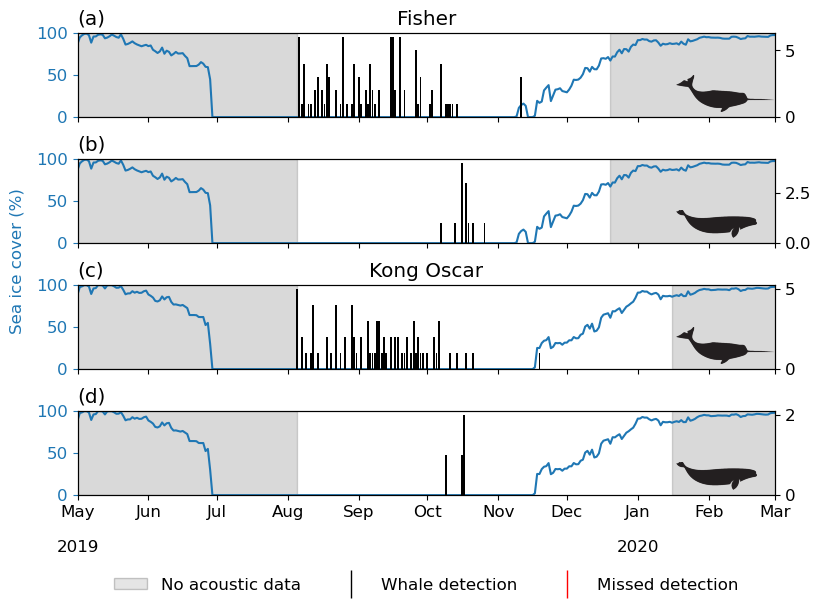

In [12]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.5)
ax1.set_xlim(np.datetime64('2019-05-01'), np.datetime64('2020-03-01'))

## FISHER ====
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax1)
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax2)

# add detections ----
ax1_twin = ax1.twinx()
ax1_twin.bar(fish_narwhal_det_hrsperday_da.time,fish_narwhal_det_hrsperday_da.values,\
             color='k')
ax2_twin = ax2.twinx()
ax2_twin.bar(fish_beluga_det_hrsperday_da.time,fish_beluga_det_hrsperday_da.values,\
             color='k')

## KONG OSCAR ====
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax3)
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax4)

# add detections ----
ax3_twin = ax3.twinx()
ax3_twin.bar(kong_narwhal_det_hrsperday_da.time,kong_narwhal_det_hrsperday_da.values,\
             color='k')
ax4_twin = ax4.twinx()
ax4_twin.bar(kong_beluga_det_hrsperday_da.time,kong_beluga_det_hrsperday_da.values,\
             color='k')

ax4.set_xlabel("Month",labelpad=20)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.margins(x=0,y=0)
    ax.set_ylim(0,100)
    ax.tick_params(axis='y', colors='tab:blue')

ax1.set_title("Fisher")
ax1.set_title("(a)", loc='left')
ax2.set_title("(b)", loc='left')
ax3.set_title("Kong Oscar")
ax3.set_title("(c)", loc='left')
ax4.set_title("(d)", loc='left')

# shade regions when ST was not recording
# Fisher
for ax in (ax1,ax2):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2019-12-20'), np.datetime64('2020-04-01'), color='black', alpha=0.15)
# Kong Oscar
for ax in (ax3,ax4):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2020-01-16'), np.datetime64('2020-04-01'), color='black', alpha=0.15);
    
months   = pd.period_range(np.datetime64('2019-05'), freq='M', periods=11).strftime('%Y-%m').tolist()
abbrev = ["May\n\n2019",'Jun','Jul','Aug',"Sep","Oct",'Nov','Dec',"Jan\n\n2020",'Feb','Mar']
ax4.set_xticks(months, [])
ax4.set_xticks(months, abbrev, rotation=0, horizontalalignment = 'center');

## add icons for beluga and narwhal
beluga  = plt.imread('beluga_icon.png') # insert local path of the image
narwhal = plt.imread('narwhal_icon.png')
## plot icons
ax1_insert = fig.add_axes([0.79,0.7,0.11,0.11], anchor='NE', zorder=1)
ax1_insert.imshow(narwhal)
ax2_insert = fig.add_axes([0.79,0.495,0.09,0.09], anchor='NE', zorder=1)
ax2_insert.imshow(beluga)
ax3_insert = fig.add_axes([0.79,0.28,0.11,0.11], anchor='NE', zorder=1)
ax3_insert.imshow(narwhal)
ax4_insert = fig.add_axes([0.79,0.075,0.09,0.09], anchor='NE', zorder=1)
ax4_insert.imshow(beluga)

fig.text(0.05,0.5,"Sea ice cover (%)",verticalalignment='center',color='tab:blue',rotation=90)

for ax in (ax1_insert,ax2_insert,ax3_insert,ax4_insert):
    ax.axis('off')
    
## add legend
legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),
                   Line2D([], [], marker='|', linestyle='None',color='k', lw=1,markersize=20, label='Whale detection'),
                   Line2D([], [], marker='|', linestyle='None',color='r', lw=1,markersize=20, label='Missed detection')]
ax4.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.8),frameon=False);

# plt.savefig('figures/detections_seaice_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

Hours per week

In [14]:
# group by week and get sum of hours per week that whales were present
fish_narwhal_det_hrsperwk_da = fish_narwhal_det_da.resample(time='7D').sum()
fish_beluga_det_hrsperwk_da  = fish_beluga_det_da.resample(time='7D').sum()

kong_narwhal_det_hrsperwk_da = kong_narwhal_det_da.resample(time='7D').sum()
kong_beluga_det_hrsperwk_da  = kong_beluga_det_da.resample(time='7D').sum()

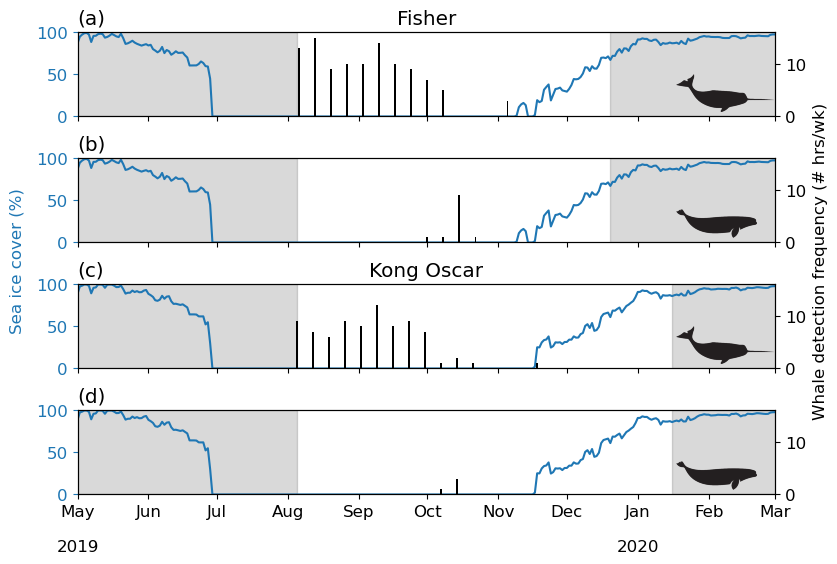

In [16]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.5)
ax1.set_xlim(np.datetime64('2019-05-01'), np.datetime64('2020-03-01'))

## FISHER ====
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax1)
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax2)

# add detections ----
ax1_twin = ax1.twinx()
ax1_twin.bar(fish_narwhal_det_hrsperwk_da.time,fish_narwhal_det_hrsperwk_da.values,\
             color='k')

ax2_twin = ax2.twinx()
ax2_twin.bar(fish_beluga_det_hrsperwk_da.time,fish_beluga_det_hrsperwk_da.values,\
             color='k')

## KONG OSCAR ====
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax3)
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax4)

# add detections ----
ax3_twin = ax3.twinx()
ax3_twin.bar(kong_narwhal_det_hrsperwk_da.time,kong_narwhal_det_hrsperwk_da.values,\
             color='k')
ax4_twin = ax4.twinx()
ax4_twin.bar(kong_beluga_det_hrsperwk_da.time,kong_beluga_det_hrsperwk_da.values,\
             color='k')

ax4.set_xlabel("Month",labelpad=20)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.margins(x=0,y=0)
    ax.set_ylim(0,100)
    ax.tick_params(axis='y', colors='tab:blue')

ax1.set_title("Fisher")
ax1.set_title("(a)", loc='left')
ax2.set_title("(b)", loc='left')
ax3.set_title("Kong Oscar")
ax3.set_title("(c)", loc='left')
ax4.set_title("(d)", loc='left')

# shade regions when ST was not recording
# Fisher
for ax in (ax1,ax2):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2019-12-20'), np.datetime64('2020-04-01'), color='black', alpha=0.15)
# Kong Oscar
for ax in (ax3,ax4):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2020-01-16'), np.datetime64('2020-04-01'), color='black', alpha=0.15);
    
months   = pd.period_range(np.datetime64('2019-05'), freq='M', periods=11).strftime('%Y-%m').tolist()
abbrev = ["May\n\n2019",'Jun','Jul','Aug',"Sep","Oct",'Nov','Dec',"Jan\n\n2020",'Feb','Mar']
ax4.set_xticks(months, [])
ax4.set_xticks(months, abbrev, rotation=0, horizontalalignment = 'center');

## add icons for beluga and narwhal
beluga  = plt.imread('beluga_icon.png') # insert local path of the image
narwhal = plt.imread('narwhal_icon.png')
## plot icons
ax1_insert = fig.add_axes([0.79,0.7,0.11,0.11], anchor='NE', zorder=1)
ax1_insert.imshow(narwhal)
ax2_insert = fig.add_axes([0.79,0.495,0.09,0.09], anchor='NE', zorder=1)
ax2_insert.imshow(beluga)
ax3_insert = fig.add_axes([0.79,0.28,0.11,0.11], anchor='NE', zorder=1)
ax3_insert.imshow(narwhal)
ax4_insert = fig.add_axes([0.79,0.075,0.09,0.09], anchor='NE', zorder=1)
ax4_insert.imshow(beluga)

fig.text(0.05,0.5,"Sea ice cover (%)",verticalalignment='center',color='tab:blue',rotation=90)
fig.text(0.95,0.5,"Whale detection frequency (# hrs/wk)",verticalalignment='center',\
         horizontalalignment='center',color='k',rotation=90)

for ax in (ax1_insert,ax2_insert,ax3_insert,ax4_insert):
    ax.axis('off')
    
## add legend
# legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),
#                    Line2D([], [], marker='|', linestyle='None',color='k', lw=1,markersize=20, label='Whale detection'),
#                    Line2D([], [], marker='|', linestyle='None',color='r', lw=1,markersize=20, label='Missed detection')]
# ax4.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.8),frameon=False);

## set limits for y axis for twin axes
for ax in (ax1_twin, ax2_twin, ax3_twin, ax4_twin):
    ax.set_ylim(0,16)

# plt.savefig('figures/detections_seaice_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

Make bars thicker using Pandas

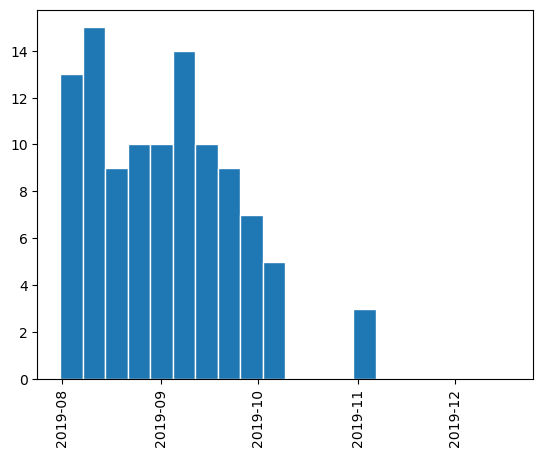

In [12]:
fish_narwhal_det_df = pd.DataFrame(fish_narwhal_det_hrsperwk_da.values,columns=['detections'],\
                                   index=fish_narwhal_det_hrsperwk_da.time)
fish_narwhal_7D = pd.DataFrame(fish_narwhal_det_df['detections'].resample('W',label='left').sum())

fig, ax = plt.subplots()
ax.bar(fish_narwhal_7D.index, fish_narwhal_7D.detections, width=7, edgecolor='white',align='center')
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %d"))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# ax.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=90)

plt.show()

In [15]:
## fisher narwhal
fish_narwhal_det_df = pd.DataFrame(fish_narwhal_det_hrsperwk_da.values,columns=['detections'],\
                                   index=fish_narwhal_det_hrsperwk_da.time)
fish_narwhal_7D = pd.DataFrame(fish_narwhal_det_df['detections'].resample('7D',label='left',closed='left').sum())
# fish_narwhal_7D.index = fish_narwhal_7D.index.to_timestamp() + to_offset("1D")
## fisher beluga
fish_beluga_det_df = pd.DataFrame(fish_beluga_det_hrsperwk_da.values,columns=['detections'],\
                                   index=fish_beluga_det_hrsperwk_da.time)
fish_beluga_7D = pd.DataFrame(fish_beluga_det_df['detections'].resample('7D',label='left').sum())

## kong narwhal
kong_narwhal_det_df = pd.DataFrame(kong_narwhal_det_hrsperwk_da.values,columns=['detections'],\
                                   index=kong_narwhal_det_hrsperwk_da.time)
kong_narwhal_7D = pd.DataFrame(kong_narwhal_det_df['detections'].resample('7D',label='left').sum())
## kong beluga
kong_beluga_det_df = pd.DataFrame(kong_beluga_det_hrsperwk_da.values,columns=['detections'],\
                                  index=kong_beluga_det_hrsperwk_da.time)
kong_beluga_7D = pd.DataFrame(kong_beluga_det_df['detections'].resample('7D',label='left').sum())

In [53]:
fish_narwhal_7D.index

DatetimeIndex(['2019-08-06', '2019-08-13', '2019-08-20', '2019-08-27',
               '2019-09-03', '2019-09-10', '2019-09-17', '2019-09-24',
               '2019-10-01', '2019-10-08', '2019-10-15', '2019-10-22',
               '2019-10-29', '2019-11-05', '2019-11-12', '2019-11-19',
               '2019-11-26', '2019-12-03', '2019-12-10', '2019-12-17'],
              dtype='datetime64[ns]', freq='7D')

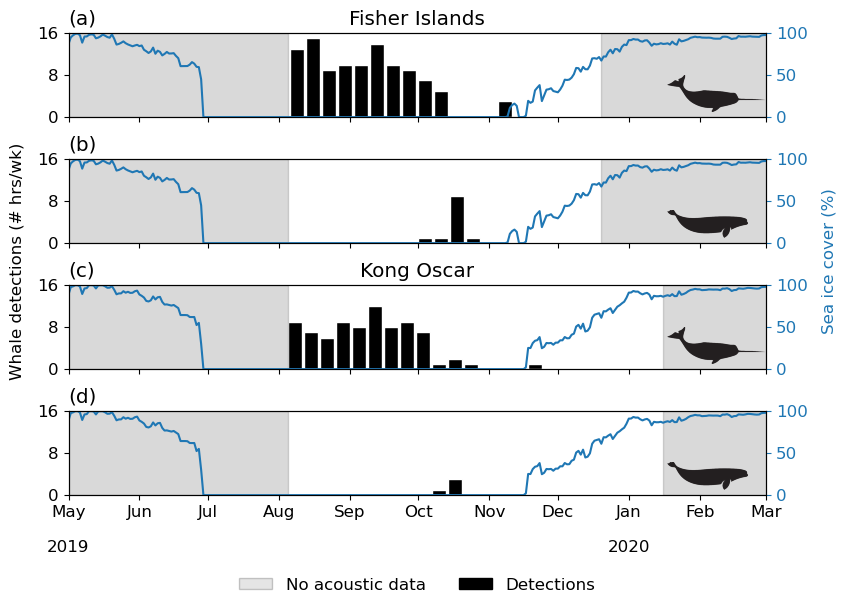

In [24]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.5)
ax1.set_xlim(np.datetime64('2019-05-01'), np.datetime64('2020-03-01'))

## FISHER ====
# add detections ----
ax1.bar(fish_narwhal_7D.index, fish_narwhal_7D.detections, width=6, color='k', edgecolor='white',align='edge')
ax2.bar(fish_beluga_7D.index, fish_beluga_7D.detections, width=6, color='k', edgecolor='white',align='edge')

# add sea ice ----
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax1_twin)
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax2_twin)

## KONG OSCAR ====
# add detections ----
ax3.bar(kong_narwhal_7D.index, kong_narwhal_7D.detections, width=6, color='k', edgecolor='white',align='edge')
ax4.bar(kong_beluga_7D.index, kong_beluga_7D.detections, width=6, color='k', edgecolor='white',align='edge')

# add sea ice ----
ax3_twin = ax3.twinx()
ax4_twin = ax4.twinx()
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax3_twin)
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax4_twin)

ax4.set_xlabel("Month",labelpad=20)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim(0,16)
    ax.set_yticks([0,8,16])

for ax in (ax1_twin,ax2_twin,ax3_twin,ax4_twin):
    ax.tick_params(axis='y', colors='tab:blue')
    ax.set_ylim(0,100)
    ax.margins(x=0,y=0)
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")

ax1.set_title("Fisher Islands")
ax1.set_title("(a)", loc='left')
ax2.set_title("(b)", loc='left')
ax3.set_title("Kong Oscar")
ax3.set_title("(c)", loc='left')
ax4.set_title("(d)", loc='left')

# shade regions when ST was not recording
# Fisher
for ax in (ax1,ax2):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2019-12-20'), np.datetime64('2020-04-01'), color='black', alpha=0.15)
# Kong Oscar
for ax in (ax3,ax4):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2020-01-16'), np.datetime64('2020-04-01'), color='black', alpha=0.15);
    
months   = pd.period_range(np.datetime64('2019-05'), freq='M', periods=11).strftime('%Y-%m').tolist()
abbrev = ["May\n\n2019",'Jun','Jul','Aug',"Sep","Oct",'Nov','Dec',"Jan\n\n2020",'Feb','Mar']
ax4.set_xticks(months, [])
ax4.set_xticks(months, abbrev, rotation=0, horizontalalignment = 'center');

## add icons for beluga and narwhal
beluga  = plt.imread('beluga_icon.png') # insert local path of the image
narwhal = plt.imread('narwhal_icon.png')
## plot icons
ax1_insert = fig.add_axes([0.79,0.7,0.11,0.11], anchor='NE', zorder=1)
ax1_insert.imshow(narwhal)
ax2_insert = fig.add_axes([0.79,0.495,0.09,0.09], anchor='NE', zorder=1)
ax2_insert.imshow(beluga)
ax3_insert = fig.add_axes([0.79,0.28,0.11,0.11], anchor='NE', zorder=1)
ax3_insert.imshow(narwhal)
ax4_insert = fig.add_axes([0.79,0.075,0.09,0.09], anchor='NE', zorder=1)
ax4_insert.imshow(beluga)

fig.text(0.06,0.5,"Whale detections (# hrs/wk)",verticalalignment='center',color='k',rotation=90)
fig.text(0.97,0.5,"Sea ice cover (%)",verticalalignment='center',\
         horizontalalignment='center',color='tab:blue',rotation=90)

for ax in (ax1_insert,ax2_insert,ax3_insert,ax4_insert):
    ax.axis('off')
    
# add legend
# legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),\
#                    Patch(facecolor='k', edgecolor='k', label='Correctly classified detections'),\
#                    Patch(facecolor='tab:red', edgecolor='r', label='Misclassified detections')]
legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),\
                   Patch(facecolor='k', edgecolor='k', label='Detections')]
ax4.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.8),frameon=False);

plt.savefig('figures/detections_seaice_fig.png', bbox_inches='tight', dpi=300, facecolor='white')